In [44]:
import pandas as pd
train_data = pd.read_csv('atec_nlp_sim_train.csv',sep='\t',header=-1)
train_data.head()

,0,1,2,3
0,1,﻿怎么更改花呗手机号码,我的花呗是以前的手机号码，怎么更改成现在的支付宝的号码手机号,1
1,2,也开不了花呗，就这样了？完事了,真的嘛？就是花呗付款,0
2,3,花呗冻结以后还能开通吗,我的条件可以开通花呗借款吗,0
3,4,如何得知关闭借呗,想永久关闭借呗,0
4,5,花呗扫码付钱,二维码扫描可以用花呗吗,0


In [45]:
import pickle as pk
tag_data = train_data[3].values
file = open('tag_data.pkl','wb')
pk.dump(tag_data,file)
file.close()
print(tag_data[0:100])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1]


In [5]:
#正类占所有数据的比重，略微不平衡，正负类1:4
print(sum(train_data[3])/len(train_data))

0.2159987541528239


In [7]:
sent_all = pd.concat([train_data[1],train_data[2]])
print(sent_all.head())
print(len(train_data),len(sent_all))

0        ﻿怎么更改花呗手机号码
1    也开不了花呗，就这样了？完事了
2        花呗冻结以后还能开通吗
3           如何得知关闭借呗
4             花呗扫码付钱
dtype: object
19264 38528


84 5 13.347850913621263 5.978861447661369


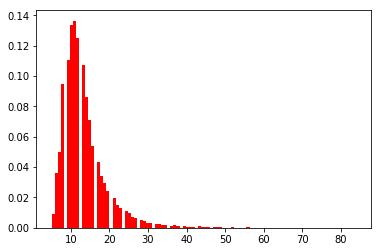

In [11]:
import numpy as np
#分析句子的长度(以字为粒度)
len_sent = [len(x) for x in sent_all]
print(max(len_sent),min(len_sent),np.mean(len_sent),np.std(len_sent))

#句子长度分布图，由图可看出，大约选择长度30即可
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(len_sent,bins=100,color="red",normed=True)
plt.show()

100%|██████████| 38528/38528 [00:02<00:00, 17289.84it/s]


64 2 8.03719372923588 4.154860527572729


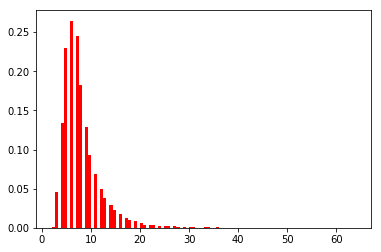

In [14]:
#分析句子长度(以词为粒度)
import jieba
from tqdm import tqdm
#输出分析发现花呗、借呗这类词出现过于频繁，故而加入这些词
jieba.add_word('花呗')
jieba.add_word('借呗')

data_split = [jieba.lcut(x) for x in tqdm(sent_all)]
len_word = [len(x) for x in data_split]
print(max(len_word),min(len_word),np.mean(len_word),np.std(len_word))

#从图分析可知
%matplotlib inline
plt.hist(len_word,bins=100,color="red",normed=True)
plt.show()

In [43]:
# 分词后不同词的总数
wordlist = []
for x in data_split:
    for word in x:
        if word not in wordlist:
            wordlist.append(word)
print(len(wordlist))

from torchnlp.text_encoders import WhitespaceEncoder
split_dataTmp = [" ".join(x) for x in data_split]
encoder = WhitespaceEncoder(split_dataTmp, min_occurrences=1)
print(len(encoder.vocab))

5937
5941


In [17]:
print(data_split[20:30])

[['是否', '有', '花呗', '就', '不', '可以', '借呗'], ['闲鱼', '可以', '使用', '花呗', '吗'], ['花呗', '可以', '买手机', '吗'], ['借呗', '每月', '还款', '时间'], ['花呗', '更改', '绑定', '银行卡'], ['人脸', '验证', '开通', '花呗'], ['借呗', '可以', '提前', '还', '第一期', '吗'], ['花呗', '付款', '成功', '为何', '美团', '显示', '支付', '超时'], ['花呗', '我', '已经', '还', '了', '，', '现在', '要', '还', '借呗'], ['国外', '账户', '可以', '开通', '借呗', '吗']]


In [20]:
import pickle as pk
file = open('split_data.pkl','wb')
pk.dump(data_split,file)
file.close()